# Gold Prices App

In this notebook, we update the app layout using CSS, and try to update the styling of every app component

## State 1

This is the original app

### Imports

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd

### Read data

In [ ]:
# Read in the data
data = pd.read_csv("precious_metals_prices_2018_2021.csv", usecols=["DateTime", "Gold"])

### Create Figure

In [ ]:
# Create a plotly plot for use by dcc.Graph(). Notice list for y= to make color_discrete_map work
fig = px.line(
    data,
    title="Precious Metal Prices 2018-2021",
    x="DateTime",
    y=["Gold"],
    color_discrete_map={"Gold": "gold"}
)

### Update Layout

In [ ]:
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Date",
    yaxis_title="Price (USD/oz)",
    font=dict(
        family="Verdana, sans-serif",
        size=18,
        color="white"
    ),
)

### Define App Layout

In [ ]:
app = dash.Dash(__name__)
app.title = "Precious Metal Prices 2018-2021"

In [ ]:
# Notice, now the app layout is updated
#   1.  added IDs for each child - This makes easier to track element in 'Inspect Element' feature in the browser
#   2. Added tags for each child
app.layout = html.Div(
    id="app-container",
    children=[
        html.Div(
            id="header-area",
            children=[
                html.H1(
                    id="header-title",
                    children="Precious Metal Prices",

                ),
                html.P(
                    id="header-description",
                    children=("The cost of precious metals", html.Br(), "between 2018 and 2021"),
                ),
            ],
        ),
        html.Div(
            id="graph-container",
            children=dcc.Graph(
                id="price-chart",
                figure=fig,
                config={"displayModeBar": False}
            ),
        ),
    ]
)

### Run the app

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

This is how the app looks like in the original state - 

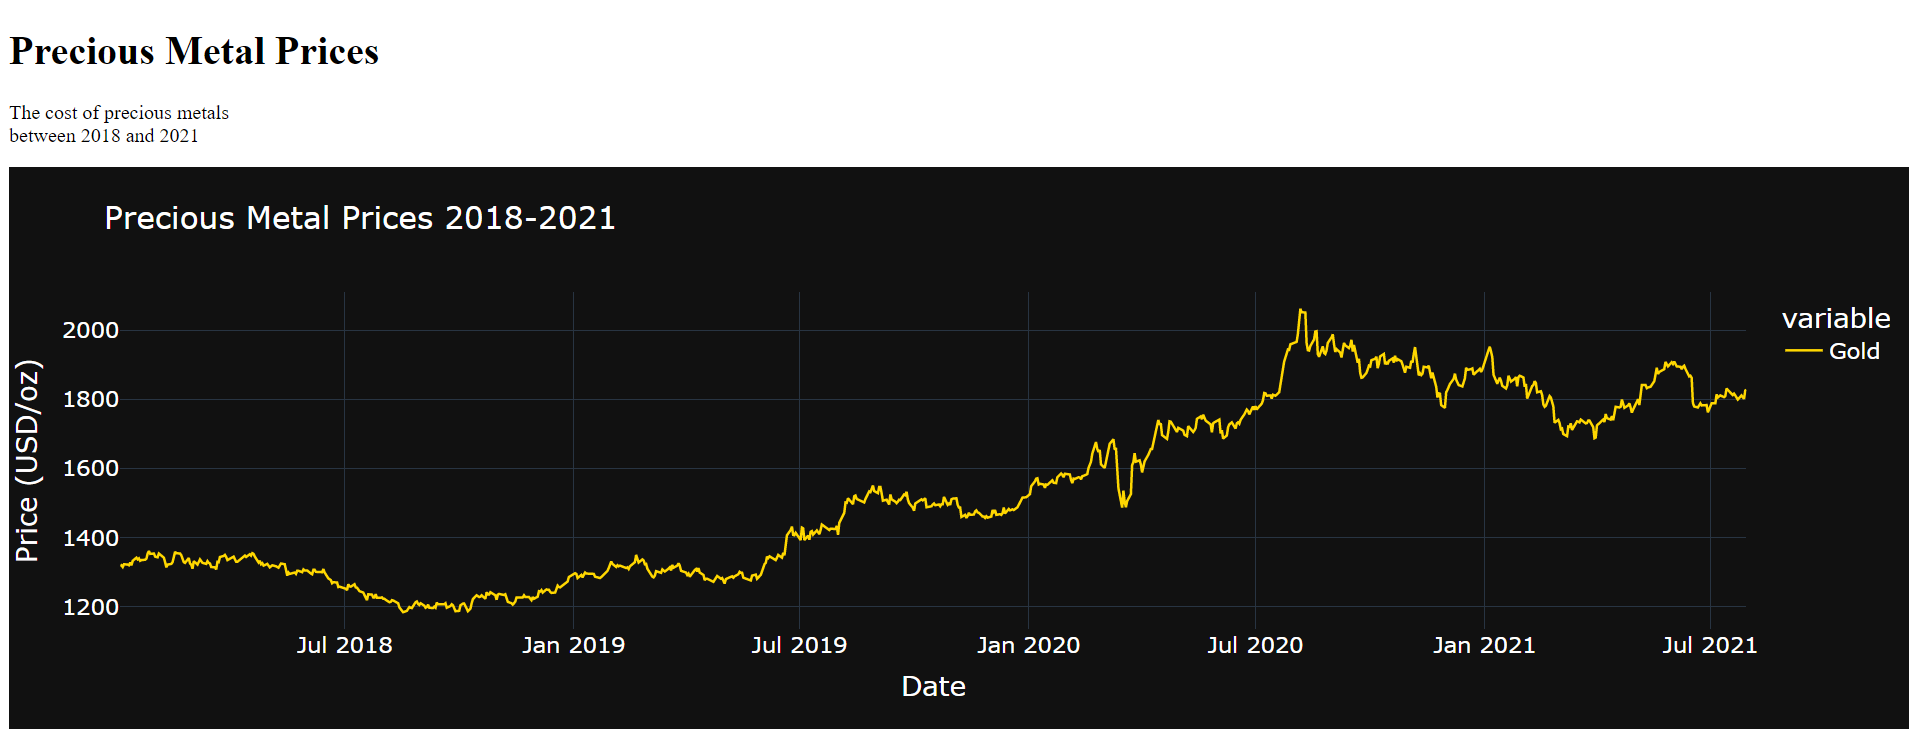

----

## State 2

This is the updated app - using Style Arguments

### Update App Layout

In [ ]:
app.layout = html.Div(
    id="app-container",
    children=[
        html.Div(
            id="header-area",
            style={"backgroundColor": 'black'},
        children = [
                       html.H1(
                           id="header-title",
                           style={'color': 'white', 'fontFamily': 'Verdana, sans-serif'},
                           children="Precious Metal Prices",

                       ),
                       html.P(
                           id="header-description",
                           style={'color': 'white', 'fontFamily': 'Verdana, sans-serif'},
                           children=("The cost of precious metals", html.Br(), "between 2018 and 2021"),
                       ),
                   ],
),
html.Div(
    id="graph-container",
    children=dcc.Graph(
        id="price-chart",
        figure=fig,
        config={"displayModeBar": False}
    ),
),
]
)

This is how the app looks after the updates - 

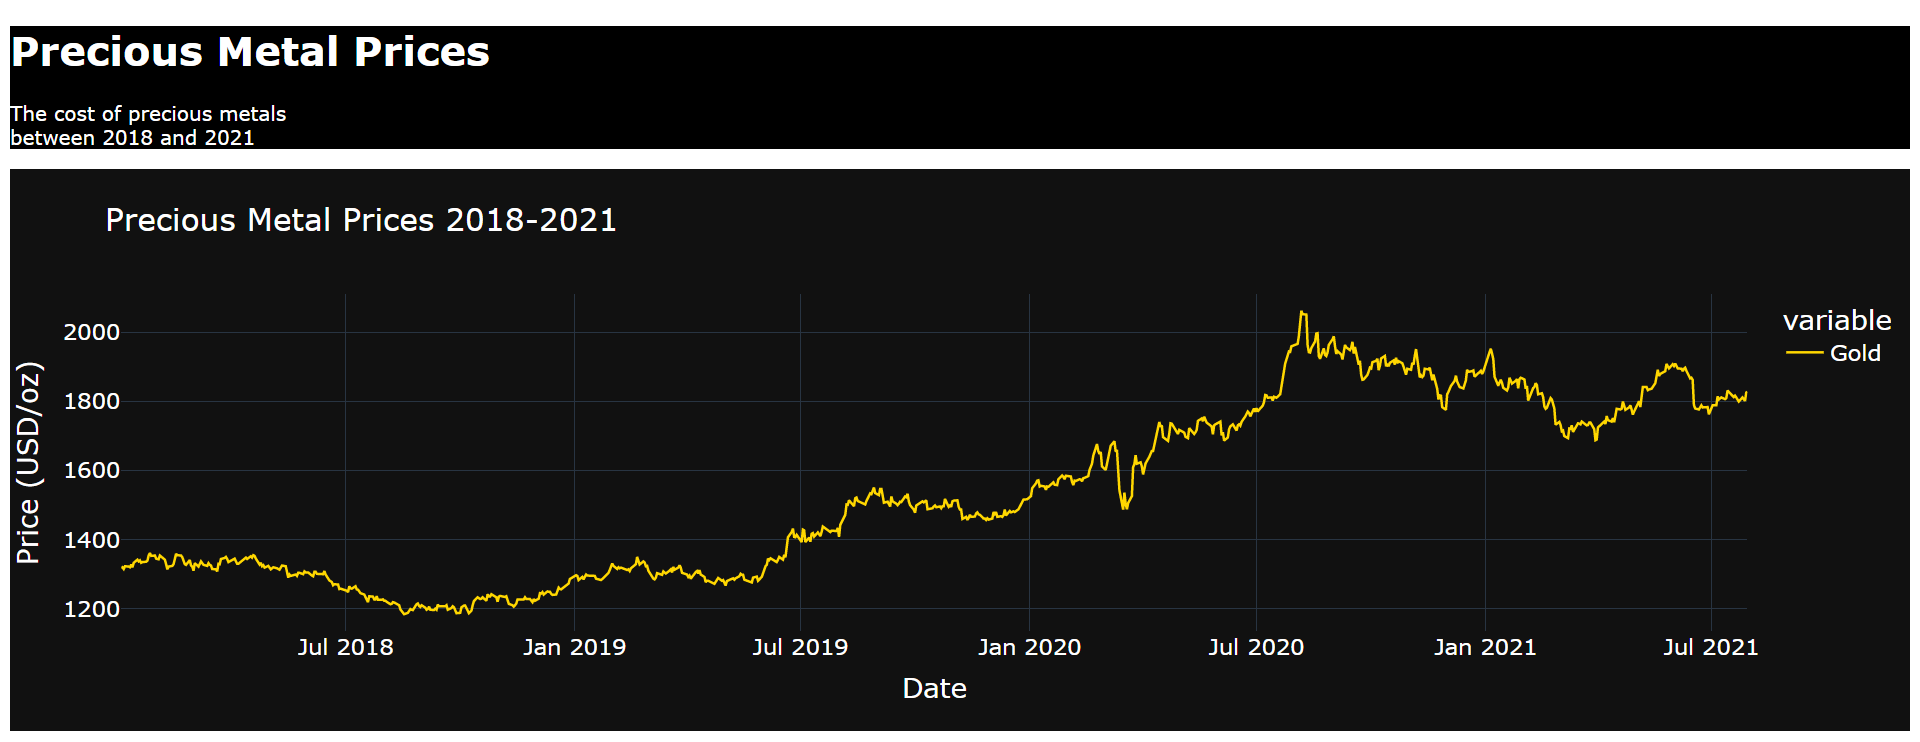

Points of interest - 

1. Notice the updated Background color of the header, accessed using id - 'header-area'
2. If we update the background color, we also need to change the color of the header to white, otherwise black over black won't be visible!
3. Notice the camel-case. This is how it needs to be when providing style arguments
4. Notice the repitition. While this method is pretty straight-forward and works really well for small apps, this method is inefficient and will create a lot of repeated lines of code in larger applications. That's why using external CSS is advised


---

## State 3

Using external CSS

By default, dash will look for external CSS, JS, Icons files in the assets folder in the root directory of the application and will add those without any additional code.
Pretty cool!

This is how the app looks like after adding the CSS - 

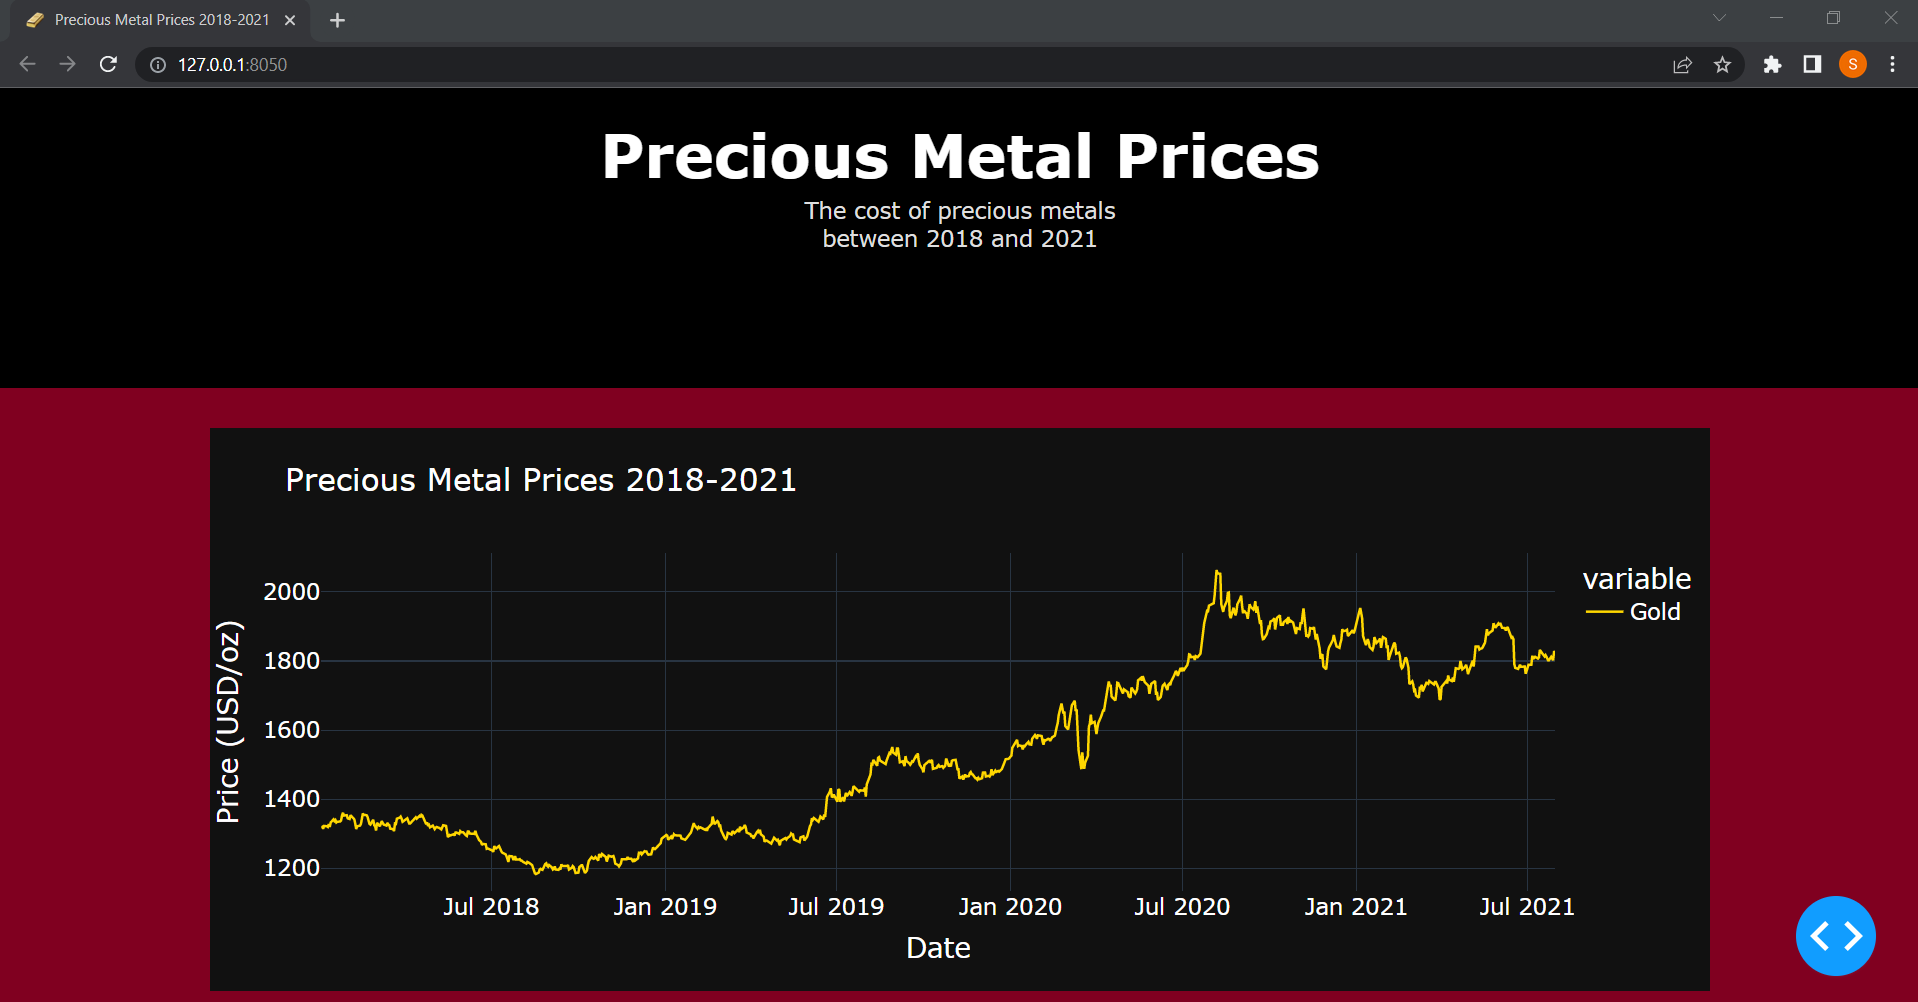

Notice the icon on the chrome tab as well 